In [4]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 10 09:53:30 2019
@author: daryl
"""


from hamming import greedy_hamming
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from gerrychain import Graph
import geopandas as gpd
from gerrychain.tree import recursive_tree_part
from gerrychain.partition import Partition
from gerrychain.updaters import Tally, cut_edges
from gerrychain.updaters import Election
from gerrychain.metrics import efficiency_gap, mean_median
import random


In [5]:
g = Graph.from_json("./Data/PA_VTD.json")
df = gpd.read_file("./Data/PA_VTD.shp")
centroids = df.centroid
c_x = centroids.x
c_y = centroids.y
shape = True

nlist = list(g.nodes())
n = len(nlist)

totpop = 0
for node in g.nodes():
    g.node[node]["TOT_POP"]=int(g.node[node]["TOT_POP"])

    totpop += g.node[node]["TOT_POP"]
    

if shape:
    pos = {node:(c_x[node],c_y[node]) for node in g.nodes}

cddicts = []



In [36]:
cddicts = []

num_trees = 8
for i in range(num_trees):
    cddicts.append(recursive_tree_part(g,range(18),totpop/18,"TOT_POP", .02,1))


def step_num(partition):
    parent = partition.parent
    if not parent:
        return 0
    return parent["step_num"] + 1

def b_nodes_bi(partition):
    return {x[0] for x in partition["cut_edges"]}.union({x[1] for x in partition["cut_edges"]})   


updaters = {
    "population": Tally("TOT_POP"),
    "cut_edges": cut_edges,
    "step_num": step_num,
    'b_nodes': b_nodes_bi,
    'SEN16':Election('SEN16',{'DEM':'T16SEND','GOP':'T16SENR'})
}

cols=['2011_PLA_1','GOV','TS','REMEDIAL_P',
      '538CPCT__1', '538DEM_PL','538GOP_PL','8THGRADE_1']


Parts=[ Partition(g,cddicts[i],updaters) for i in range(num_trees)]
for col in cols:
    Parts.append(Partition(g,col,updaters))


for i in range(num_trees):
    cols.insert(0,f'Tree{i}')




In [37]:

def pop_dev(part):
    pops = list(part["population"].values())
    return (np.max(pops)-np.min(pops))/np.sum(pops)

def distance_between(part1,part2):
    
    #tempnames,ham = greedy_hamming(part1,part2)
    #return ham
 
    #return abs(len(part1["cut_edges"])-len(part2["cut_edges"]))/len(g.edges()) + abs(pop_dev(part1)-pop_dev(part2))
    #return abs(np.max(list(part1["population"].values()))-np.max(list(part2["population"].values())))
    
    #return 1/(1+len(part1['b_nodes'].intersection(part2['b_nodes'])))
    
    return abs(mean_median(part1["SEN16"])-  mean_median(part2["SEN16"])) + abs(efficiency_gap(part1["SEN16"])-  efficiency_gap(part2["SEN16"]))
    
    #a1=sorted(part1["SEN16"].percents("DEM"))
    #a2=sorted(part2["SEN16"].percents("DEM"))
    
    
    
    #return sum([abs(a1[x]-a2[x]) for x in range(len(a1))])
    
    

In [38]:
a = np.zeros([len(Parts),len(Parts)])

for i in range(len(Parts)):
    for j in range(len(Parts)):
        if i>j:
            temp = distance_between(Parts[i],Parts[j])
            a[i,j]=temp
            a[j,i]=temp



In [39]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=.00001, 
                   dissimilarity="precomputed", n_jobs=1)


pos = mds.fit(a).embedding_

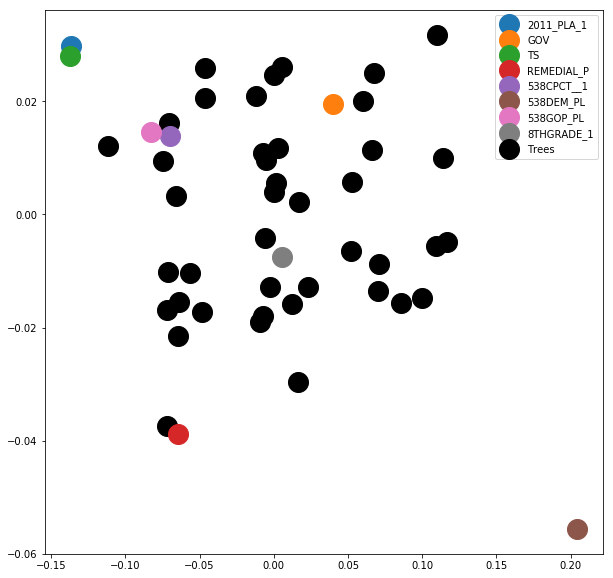

In [42]:
plt.figure(figsize=(10,10))
for i in range(len(pos)):
    if i<num_trees:
        plt.plot(pos[i][0],pos[i][1],'o',color='k',markersize=20)
    else:
        plt.plot(pos[i][0],pos[i][1],'o',label=cols[i],markersize=20)
plt.plot([],[],'o',color='k',label="Trees",markersize=20)
plt.legend()    
plt.show()


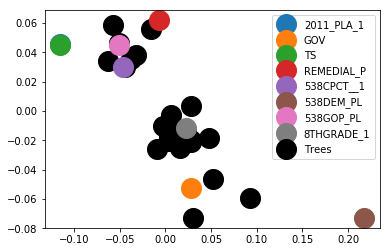

In [35]:
plt.figure()
for i in range(len(pos)):
    if i<num_trees:
        plt.plot(pos[i][0],pos[i][1],'o',color='k',markersize=20)
    else:
        plt.plot(pos[i][0],pos[i][1],'o',label=cols[i],markersize=20)
plt.plot([],[],'o',color='k',label="Trees",markersize=20)
plt.legend()    
plt.show()


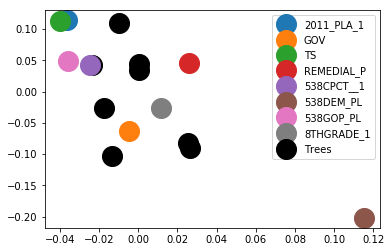

In [10]:
plt.figure()
for i in range(len(pos)):
    if i<num_trees:
        plt.plot(pos[i][0],pos[i][1],'o',color='k',markersize=20)
    else:
        plt.plot(pos[i][0],pos[i][1],'o',label=cols[i],markersize=20)
plt.plot([],[],'o',color='k',label="Trees",markersize=20)
plt.legend()    
plt.show()




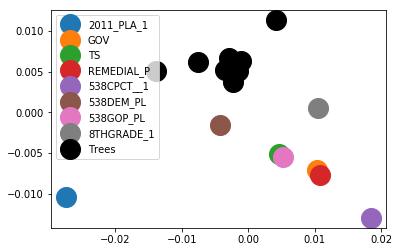

In [18]:
plt.figure()
for i in range(len(pos)):
    if i<num_trees:
        plt.plot(pos[i][0],pos[i][1],'o',color='k',markersize=20)
    else:
        plt.plot(pos[i][0],pos[i][1],'o',label=cols[i],markersize=20)
plt.plot([],[],'o',color='k',label="Trees",markersize=20)
plt.legend()    
plt.show()




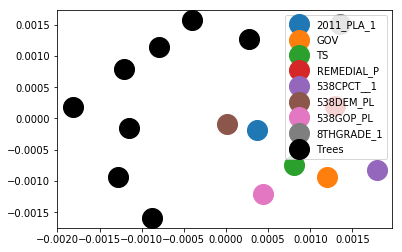

In [22]:
plt.figure()
for i in range(len(pos)):
    if i<num_trees:
        plt.plot(pos[i][0],pos[i][1],'o',color='k',markersize=20)
    else:
        plt.plot(pos[i][0],pos[i][1],'o',label=cols[i],markersize=20)
plt.plot([],[],'o',color='k',label="Trees",markersize=20)
plt.legend()    
plt.show()


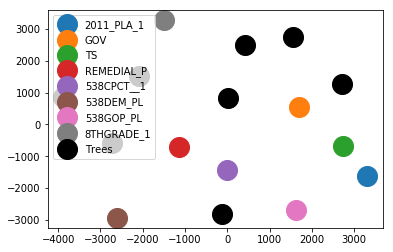

In [26]:
plt.figure()
for i in range(len(pos)):
    if i<num_trees:
        plt.plot(pos[i][0],pos[i][1],'o',color='k',markersize=20)
    else:
        plt.plot(pos[i][0],pos[i][1],'o',label=cols[i],markersize=20)
plt.plot([],[],'o',color='k',label="Trees",markersize=20)
plt.legend()    
plt.show()


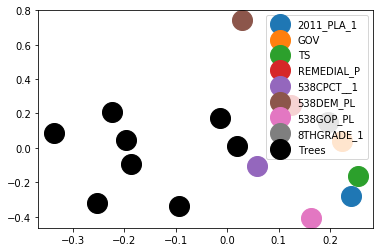

In [30]:
plt.figure()
for i in range(len(pos)):
    if i<num_trees:
        plt.plot(pos[i][0],pos[i][1],'o',color='k',markersize=20)
    else:
        plt.plot(pos[i][0],pos[i][1],'o',label=cols[i],markersize=20)
plt.plot([],[],'o',color='k',label="Trees",markersize=20)
plt.legend()    
plt.show()
